In [45]:
# https://blog.csdn.net/weixin_42600072/article/details/88644229
import numpy as np
import matplotlib.pyplot as plt
# from scipy import stats
# import seaborn as sns;sns.set()

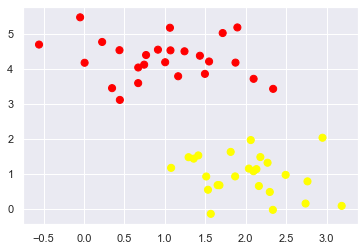

In [46]:
from sklearn.datasets.samples_generator import make_blobs          # 使用make_blobs函数为聚类产生数据集
X,y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)     # (50个样本，分2类，随机数种子，离散程度)   # X是每个带你横纵坐标，y是该点分类0-1
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')           # 画出原始数据散点图

# 1. 训练一个基本的SVC（重要）
对于非环形的已经可以分的很好了
svm.SVC  Support Vector Classification. 分类
svm.SVR  Support Vector Regression  回归

In [47]:
from sklearn.svm import SVC     # SVM可以用于分类、回归、异常检测。SVM库中包括SVC、LinearSVC接口

model = SVC(kernel='linear')    # 核函数是linear那么就是线性向量机
model.fit(X, y)  # 开始训练

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
# 自定义绘图函数，后面直接调用即可，不要去深究这个，我看不懂。
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()     # plt.gca()获取所有轴
    xlim = ax.get_xlim()   # 从ax获取x轴
    ylim = ax.get_ylim()   # 从ax获取y轴
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

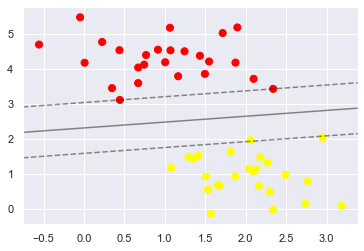

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')   # 画出原始数据散点图
plot_svc_decision_function(model)  # 调用自定义的画图函数画线

这条线就是我们希望得到的决策边界啦观察发现有3个点做了特殊的标记，它们恰好都是边界上的点，它们就是我们的support vectors（支持向量）。

In [50]:
model.support_vectors_    # 直接打印支持向量的点坐标

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

# 2. 引入核函数的SVM
对于环形的必须引入核函数才能分类

In [51]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(100, factor=0.1, noise=0.1)   # 准备环形原始数据
clf = SVC(kernel='rbf', C=1E6)     # 将线性函数改为径向基函数(径向基、高斯核、rdf指的都是高斯核变换函数) ； C是严格程度参数。
clf.fit(X, y)      # 训练非线性SVM支持向量机

SVC(C=1000000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

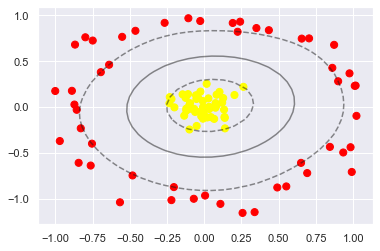

In [52]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')  # 画原始数据散点图
plot_svc_decision_function(clf)        # 画非线性支持向量机

使用这种核支持向量机，我们学习一个合适的非线性决策边界。这种核变换策略在机器学习中经常被使用

# 3. 调节C参数: Soft Margin问题

调节SVC(kernel='rbf', C=1E6)的C参数 

    当C趋近于无穷大时：会过拟合
    当C趋近于很小的时：意味着可以有更大的错误容忍

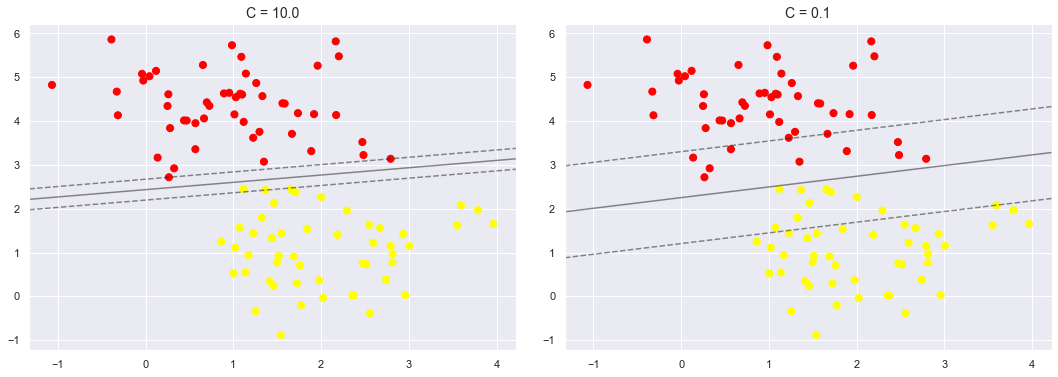

In [41]:
X, y = make_blobs(n_samples=100, centers=2,random_state=0, cluster_std=0.8)     # 模拟线性向量机的原始数据

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# 4. 调节gamma参数
gamma 越大，支持向量越少；gamma 越小，支持向量越多。 

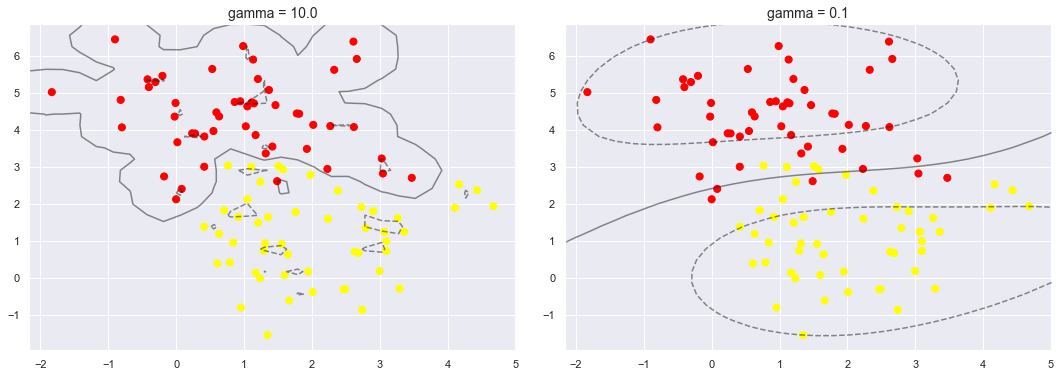

In [30]:
# gamma越大，上升维度越高，模型越复杂（左图）； gamma越小，上升维度越少，模型越精简（右图）。
X, y = make_blobs(n_samples=100, centers=2,random_state=0, cluster_std=1.1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, gamma in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='rbf', gamma=gamma).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('gamma = {0:.1f}'.format(gamma), size=14)


# 一个人脸识别的实战案例
https://blog.csdn.net/weixin_44679856/article/details/107909259

In [31]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


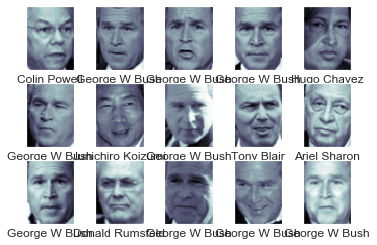

In [32]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [13]:
# 使用pca降维
from sklearn.svm import SVC
#from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=40)

In [15]:
# GridSearchCV自动调优参数
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10],
              'svc__gamma': [0.0001, 0.0005, 0.001]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 28.9 s
{'svc__C': 5, 'svc__gamma': 0.001}


In [16]:
model = grid.best_estimator_
yfit = model.predict(Xtest)
yfit.shape

(337,)

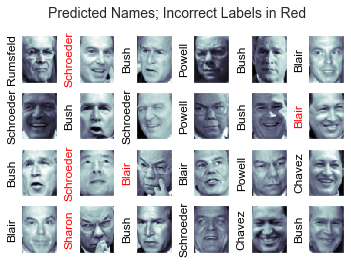

In [17]:
# 黑色是预测正确的，红色是预测错误的
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);